In [1]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr

from sklearn.linear_model import LinearRegression
from tqdm import tqdm


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random
%matplotlib inline

In [2]:
start_date = '20200520' #시작 날짜 지정해주기
end_date = '20220218' #끝나는 날짜 지정해주기

start_weekday = pd.to_datetime(start_date).weekday()
max_weeknum = pd.to_datetime(end_date).strftime('%V')
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date']) 

print(f'WEEKDAY of "start_date" : {start_weekday}')
print(f'NUM of WEEKS to "end_date" : {max_weeknum}')
print(f'HOW MANY "Business_days" : {Business_days.shape}',)

WEEKDAY of "start_date" : 2
NUM of WEEKS to "end_date" : 07
HOW MANY "Business_days" : (458, 1)


In [4]:
#EDA용 삼성전자 데이터셋
start_date = '20200529' #시작 날짜 지정해주기
end_date = '20220218' #끝나는 날짜 지정해주기
samsungstock = fdr.DataReader('005930', start = start_date, end = end_date)[['Close','Open','High','Low','Volume','Change']] 
samsungstock['High-Low']=samsungstock['High']-samsungstock['Low'] #고가-저가 변수 추가
samsungstock['Close-Open']=samsungstock['Close']-samsungstock['Open'] #종가-시가 변수 추가

exchange=fdr.DataReader('USD/KRW', start = start_date, end = end_date)[['Close']] 
exchange.columns=['exchange']
kospi=fdr.DataReader('KS11', start = start_date, end = end_date)[['Close']] 
kospi.columns=['kospi']
kosdaq=fdr.DataReader('KQ11', start = start_date, end = end_date)[['Close']] 
kosdaq.columns=['kosdaq']
dow=fdr.DataReader('DJI', start = start_date, end = end_date)[['Close']] 
dow.columns=['dow']
nasdaq=fdr.DataReader('IXIC',start = start_date, end = end_date)[['Close']] 
nasdaq.columns=['nasdaq']
sp500=fdr.DataReader('US500', start = start_date, end = end_date)[['Close']] 
sp500.columns=['sp500']

newvariable = pd.concat([samsungstock,exchange,kospi,kosdaq,dow,nasdaq,sp500],axis=1, join='outer')
newvariable=newvariable.reset_index()


미국 지수 하루 씩 미뤄주고 null값 채워서 데이터셋 다시 만들기 ▼

In [5]:
dow_nan = newvariable[newvariable['dow'].isnull()].index
nasdaq_nan = newvariable[newvariable['nasdaq'].isnull()].index
sp500_nan = newvariable[newvariable['sp500'].isnull()].index

In [6]:
for i in dow_nan:
    for j in range(6,12):
        n = newvariable.iloc[i-1,-j]
        newvariable.iloc[i,-j] = n

In [7]:
for i in nasdaq_nan:
    for j in range(6,12):
        n = newvariable.iloc[i-1,-j]
        newvariable.iloc[i,-j] = n

In [8]:
for i in sp500_nan:
    for j in range(6,12):
        n = newvariable.iloc[i-1,-j]
        newvariable.iloc[i,-j] = n

In [9]:
newvariable[['dow','nasdaq','sp500']] = newvariable[['dow','nasdaq','sp500']].shift(1)
newvariable.isnull().sum()

Date           0
Close         23
Open          23
High          23
Low           23
Volume        23
Change        23
High-Low      23
Close-Open    23
exchange       0
kospi         23
kosdaq        23
dow           15
nasdaq        15
sp500         15
dtype: int64

In [10]:
Close_nan = newvariable[newvariable['Close'].isnull()].index
Open_nan = newvariable[newvariable['Open'].isnull()].index
High_nan = newvariable[newvariable['High'].isnull()].index
Low_nan = newvariable[newvariable['Low'].isnull()].index
Volume_nan = newvariable[newvariable['Volume'].isnull()].index
Change_nan = newvariable[newvariable['Change'].isnull()].index
High_Low_nan = newvariable[newvariable['High-Low'].isnull()].index
kospi_nan = newvariable[newvariable['kospi'].isnull()].index
kosdaq_nan = newvariable[newvariable['kosdaq'].isnull()].index

In [11]:
nan_list = set(Close_nan.to_list() + Open_nan.to_list() + High_nan.to_list() +
               Low_nan.to_list() + Volume_nan.to_list() + Change_nan.to_list() + High_Low_nan.to_list() + 
               kospi_nan.to_list() + kosdaq_nan.to_list())

In [12]:
newvariable.drop(nan_list, inplace=True)

In [13]:
newvariable.drop(0, axis=0, inplace=True)

In [14]:
newvariable.isnull().sum()

Date           0
Close          0
Open           0
High           0
Low            0
Volume         0
Change         0
High-Low       0
Close-Open     0
exchange       0
kospi          0
kosdaq         0
dow           14
nasdaq        14
sp500         14
dtype: int64

In [15]:
newvariable_a = newvariable.interpolate("ffill") #ffill=이전값으로 채워주기
newvariable_a.isnull().sum()

Date          0
Close         0
Open          0
High          0
Low           0
Volume        0
Change        0
High-Low      0
Close-Open    0
exchange      0
kospi         0
kosdaq        0
dow           0
nasdaq        0
sp500         0
dtype: int64

In [16]:
newvariable_a=newvariable_a.reset_index(drop=True) # index (0~354)순서대로 재설정
newvariable_a

,Date,Close,Open,High,Low,Volume,Change,High-Low,Close-Open,exchange,kospi,kosdaq,dow,nasdaq,sp500
0,2020-06-01,51200.0,50800.0,51200.0,50600.0,16949183.0,0.009862,600.0,400.0,1222.92,2065.08,735.72,25383.11,9489.87,3044.31
1,2020-06-02,51400.0,51000.0,51500.0,50800.0,14247933.0,0.003906,700.0,400.0,1219.62,2087.19,743.58,25475.02,9552.05,3055.73
2,2020-06-03,54500.0,51800.0,55000.0,51700.0,49257814.0,0.060311,3300.0,2700.0,1215.79,2147.00,737.66,25742.65,9608.38,3080.82
3,2020-06-04,54600.0,55800.0,57000.0,54600.0,40220334.0,0.001835,2400.0,-1200.0,1216.39,2151.18,742.37,26269.89,9682.91,3122.87
4,2020-06-05,55500.0,54400.0,55900.0,54000.0,22743629.0,0.016484,1900.0,1100.0,1202.02,2181.87,749.31,26281.82,9615.81,3112.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2022-02-14,73700.0,74400.0,74500.0,73100.0,13993255.0,-0.016021,1400.0,-700.0,1197.32,2704.48,852.79,34737.47,13791.15,4418.64
422,2022-02-15,73700.0,74100.0,74200.0,73100.0,9320365.0,0.000000,1100.0,-400.0,1196.76,2676.54,839.92,34565.78,13790.92,4401.67
423,2022-02-16,74800.0,74600.0,74900.0,74200.0,10767386.0,0.014925,700.0,200.0,1196.53,2729.68,878.15,34988.31,14139.76,4471.07
424,2022-02-17,75000.0,75000.0,75600.0,74500.0,13605382.0,0.002674,1100.0,0.0,1198.63,2744.09,874.22,34935.59,14124.09,4475.01


In [17]:
# maN : N일전부터 현재까지의 종가 이동평균
newvariable_b=fdr.DataReader('005930', start = '20200519', end = end_date)[['Close']] #이동평균 만들고 na채워주려고 더 이전의 데이터 불러옴
ma10 = newvariable_b['Close'].rolling(window=10).mean()
ma10=pd.DataFrame(ma10.dropna()).reset_index()
ma10.columns=['Date','ma10']
df=pd.merge(newvariable_a,ma10, on="Date") #데이터에 이동평균 추가해주기
df=df.set_index('Date')


In [18]:
#볼린저밴드
k=2
#중심선 (MBB) : n일 이동평균선
mbb = newvariable_b.rolling(10).mean()
MA10_std = newvariable_b.rolling(10).std()
#상한선 (UBB) : 중심선 + (표준편차 × K)
#하한선 (LBB) : 중심선 - (표준편차 × K)
ubb=mbb+k*MA10_std
lbb=mbb-k*MA10_std
bb = ubb - lbb
bb.columns=['bb']
df=pd.merge(df,bb,on="Date")#볼린저밴드 데이터에 추가

In [19]:
df

,Close,Open,High,Low,Volume,Change,High-Low,Close-Open,exchange,kospi,kosdaq,dow,nasdaq,sp500,ma10,bb
Date,,,,,,,,,,,,,,,,
2020-06-01,51200.0,50800.0,51200.0,50600.0,16949183.0,0.009862,600.0,400.0,1222.92,2065.08,735.72,25383.11,9489.87,3044.31,49930.0,3152.706069
2020-06-02,51400.0,51000.0,51500.0,50800.0,14247933.0,0.003906,700.0,400.0,1219.62,2087.19,743.58,25475.02,9552.05,3055.73,50040.0,3650.022831
2020-06-03,54500.0,51800.0,55000.0,51700.0,49257814.0,0.060311,3300.0,2700.0,1215.79,2147.00,737.66,25742.65,9608.38,3080.82,50490.0,6714.362715
2020-06-04,54600.0,55800.0,57000.0,54600.0,40220334.0,0.001835,2400.0,-1200.0,1216.39,2151.18,742.37,26269.89,9682.91,3122.87,50955.0,8411.341550
2020-06-05,55500.0,54400.0,55900.0,54000.0,22743629.0,0.016484,1900.0,1100.0,1202.02,2181.87,749.31,26281.82,9615.81,3112.35,51630.0,9525.264651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,73700.0,74400.0,74500.0,73100.0,13993255.0,-0.016021,1400.0,-700.0,1197.32,2704.48,852.79,34737.47,13791.15,4418.64,73710.0,4624.379838
2022-02-15,73700.0,74100.0,74200.0,73100.0,9320365.0,0.000000,1100.0,-400.0,1196.76,2676.54,839.92,34565.78,13790.92,4401.67,73950.0,3167.894499
2022-02-16,74800.0,74600.0,74900.0,74200.0,10767386.0,0.014925,700.0,200.0,1196.53,2729.68,878.15,34988.31,14139.76,4471.07,74100.0,3188.869531


In [20]:
df.isnull().sum()

Close         0
Open          0
High          0
Low           0
Volume        0
Change        0
High-Low      0
Close-Open    0
exchange      0
kospi         0
kosdaq        0
dow           0
nasdaq        0
sp500         0
ma10          0
bb            0
dtype: int64

------------- 모든 변수 넣은 df 데이터셋 완성-----

## 변수 선택 및 전처리 위한 EDA

In [21]:
#다중공선성확인 =>데이터 셋에 null 값 없어야지만 돌아감
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif=df.drop(['Close'],axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns 
vif
#다중공선성 확인 결과 Open High Low sp500 제거!

,VIF Factor,features
0,89470.239242,Open
1,142126.017582,High
2,81966.875236,Low
3,19.372171,Volume
4,3.298499,Change
5,46.911308,High-Low
6,7.489996,Close-Open
7,433.300846,exchange
8,2995.973345,kospi
9,2194.263231,kosdaq


In [22]:
df.dtypes

Close         float64
Open          float64
High          float64
Low           float64
Volume        float64
Change        float64
High-Low      float64
Close-Open    float64
exchange      float64
kospi         float64
kosdaq        float64
dow           float64
nasdaq        float64
sp500         float64
ma10          float64
bb            float64
dtype: object

In [23]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'High-Low',
       'Close-Open', 'exchange', 'kospi', 'kosdaq', 'dow', 'nasdaq', 'sp500',
       'ma10', 'bb'],
      dtype='object')

In [24]:
df.describe()

,Close,Open,High,Low,Volume,Change,High-Low,Close-Open,exchange,kospi,kosdaq,dow,nasdaq,sp500,ma10,bb
count,426.000000,426.000000,426.000000,426.000000,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,72220.657277,72294.131455,72939.906103,71615.258216,1.928498e+07,0.000766,1323.474178,-83.802817,1154.097300,2835.994836,934.520188,32005.491854,13268.394085,3985.762887,71963.028169,5104.529851
std,10556.416305,10563.187501,10630.150416,10520.549172,8.729558e+06,0.015202,784.654676,939.133818,36.367053,371.529070,89.693081,3413.682407,1756.234562,511.641878,10707.503399,3120.338902
min,49900.000000,50800.000000,51200.000000,49900.000000,8.395448e+06,-0.045889,400.000000,-2500.000000,1083.530000,2030.820000,693.150000,25015.550000,9489.870000,3002.100000,49930.000000,942.809042
25%,60900.000000,60700.000000,61025.000000,60175.000000,1.350923e+07,-0.008395,800.000000,-600.000000,1120.070000,2433.242500,866.802500,28647.712500,11770.412500,3510.820000,59945.000000,2728.362111
50%,75300.000000,75350.000000,75900.000000,74500.000000,1.705522e+07,0.000000,1100.000000,-100.000000,1156.295000,2986.215000,963.155000,33515.380000,13629.455000,4088.560000,75340.000000,4248.812346
75%,80900.000000,81000.000000,81400.000000,80450.000000,2.224766e+07,0.008272,1600.000000,375.000000,1187.147500,3140.460000,1004.680000,34898.035000,14683.717500,4436.692500,80730.000000,6573.297864
max,91000.000000,90300.000000,96800.000000,89500.000000,9.030618e+07,0.071170,7300.000000,5500.000000,1222.920000,3305.210000,1060.000000,36799.650000,16057.440000,4796.560000,88510.000000,18408.886743


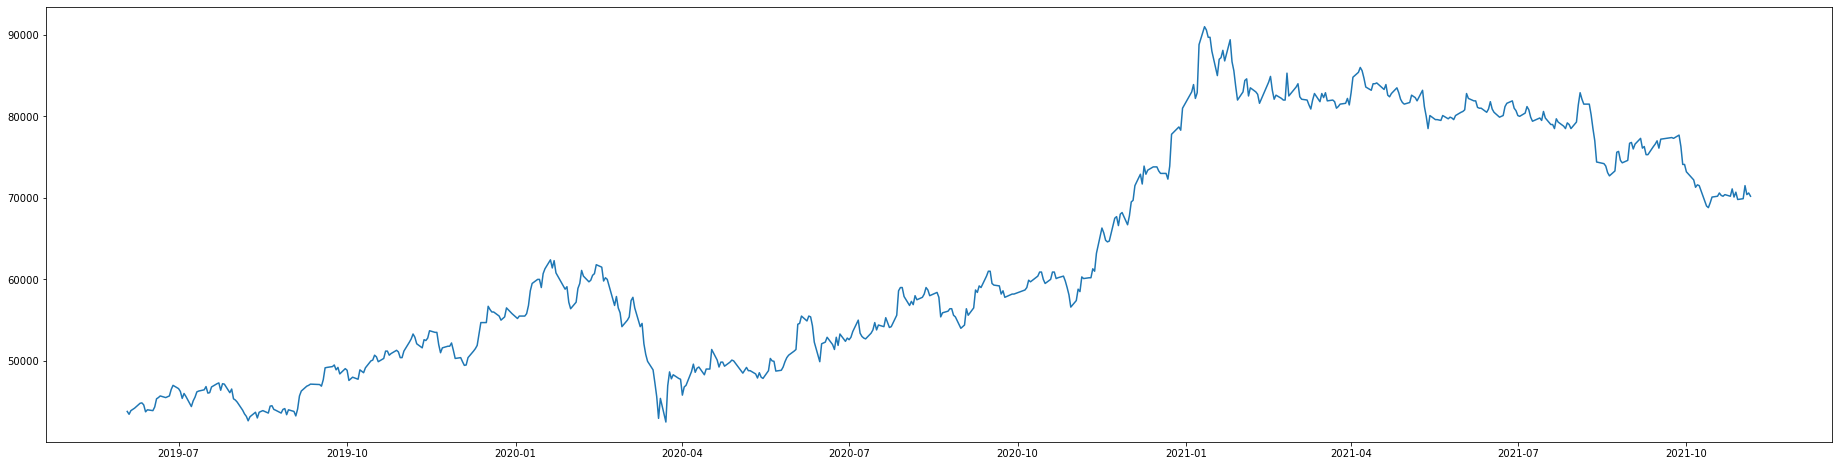

In [25]:
#주가변동확인
samsungstock2 = fdr.DataReader('005930', start = '20190601', end = '20211105')[['Close']]
plt.figure(figsize=(32,8))
plt.plot(samsungstock2.Close)
plt.show()

<AxesSubplot:>

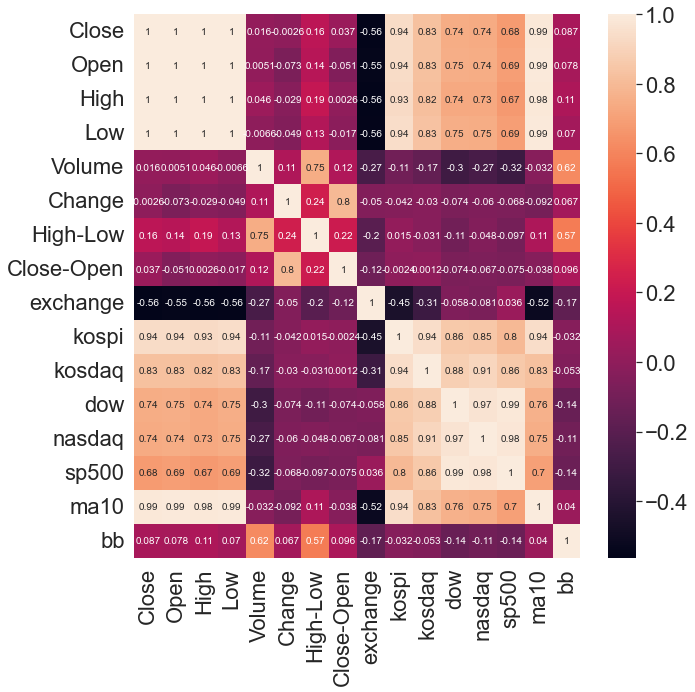

In [26]:
#삼성전자 상관분석
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(df.corr(),
               annot= True,
               annot_kws={"size": 10})
#open high low snp500 제거 해야할듯

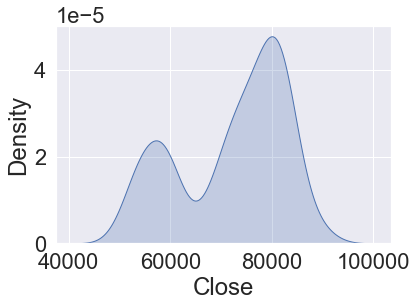

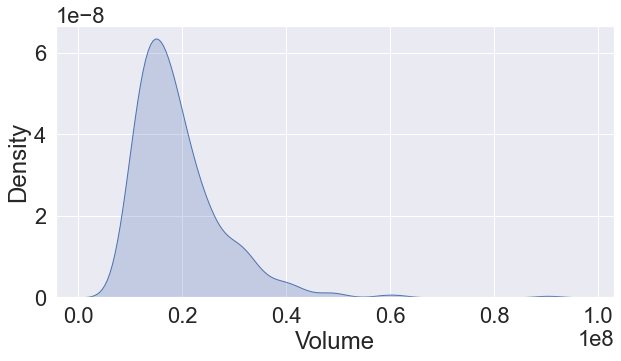

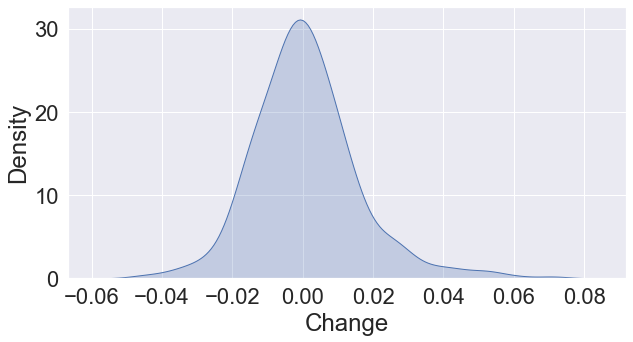

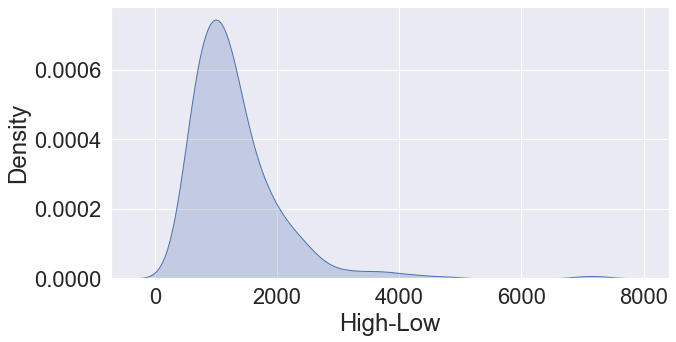

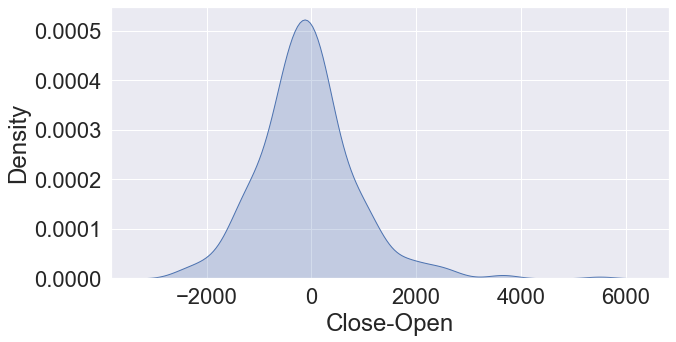

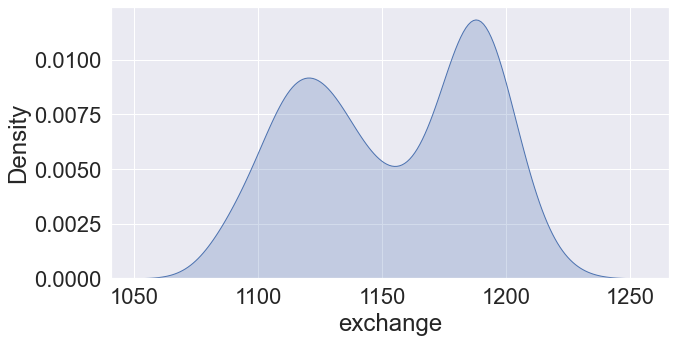

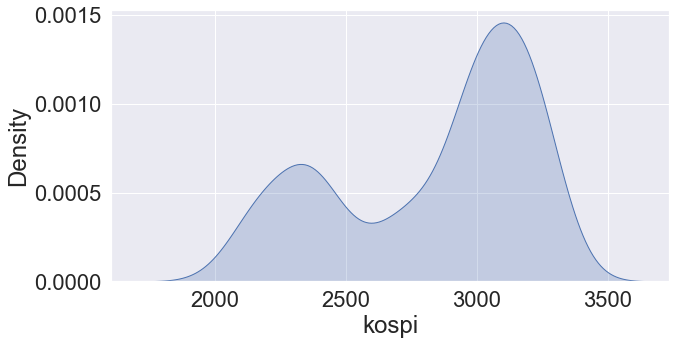

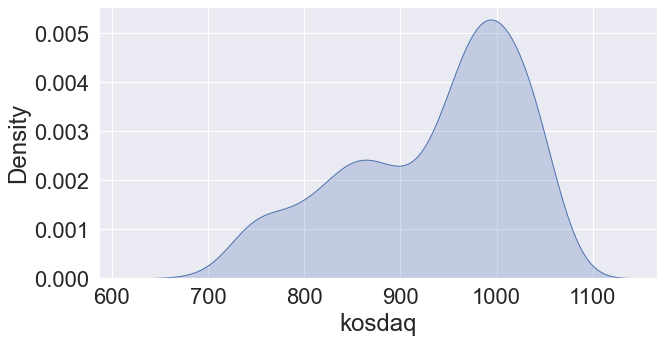

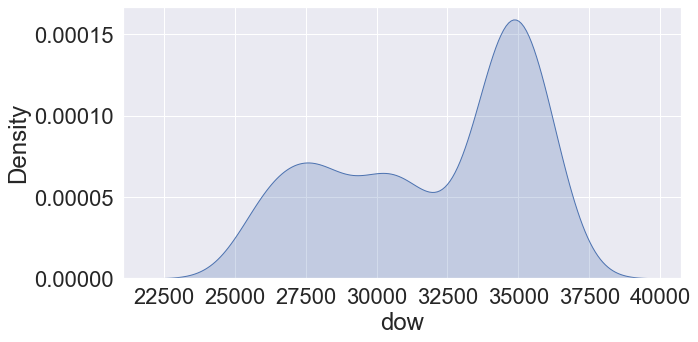

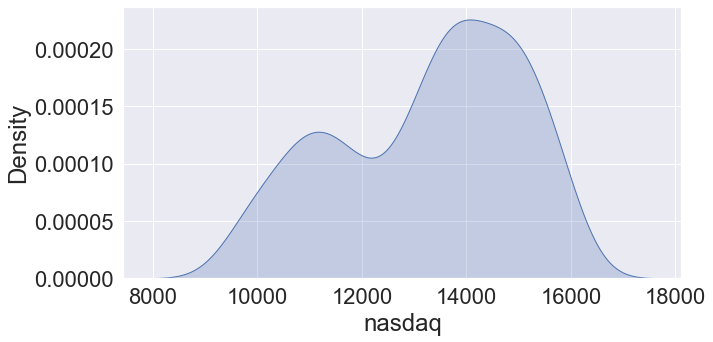

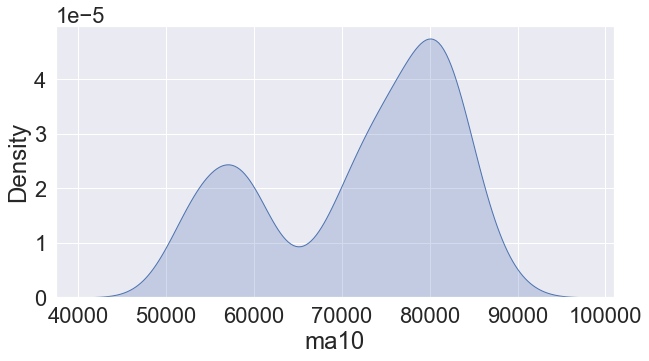

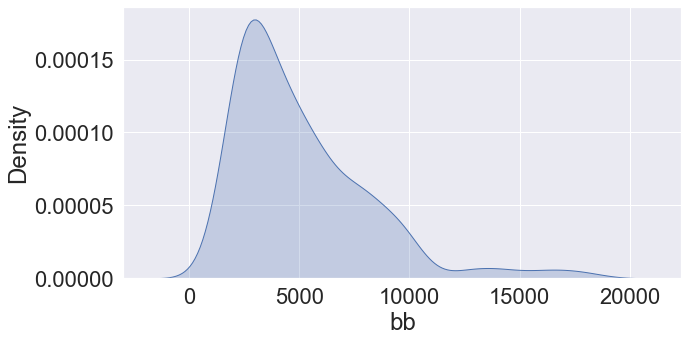

<Figure size 720x360 with 0 Axes>

In [27]:
#밀도만 확인
for col in df.columns:
    if col in ['Close', 'Volume','Change','High-Low','Close-Open','exchange','kospi',
              'kosdaq','dow','nasdaq','ma10','bb']:
        sns.kdeplot(data=df, x=df[col], shade = True)
        plt.figure(figsize=(10,5))

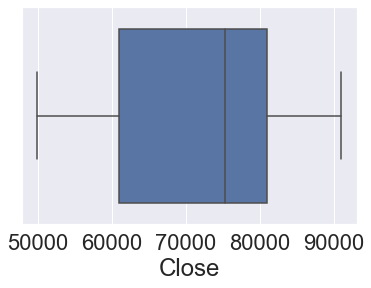

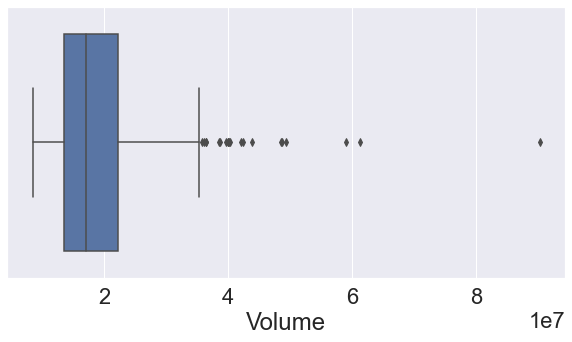

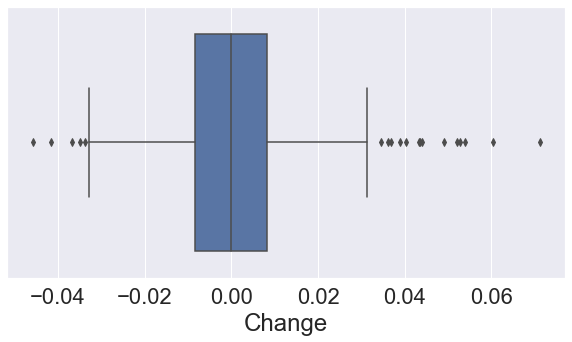

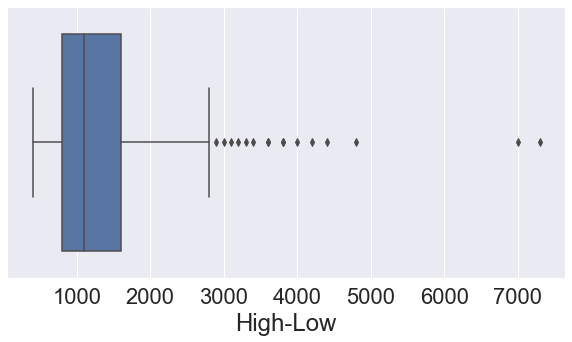

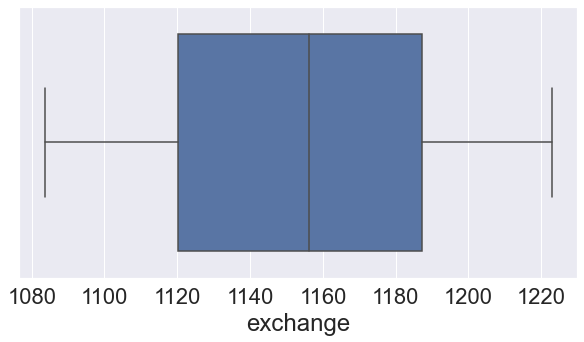

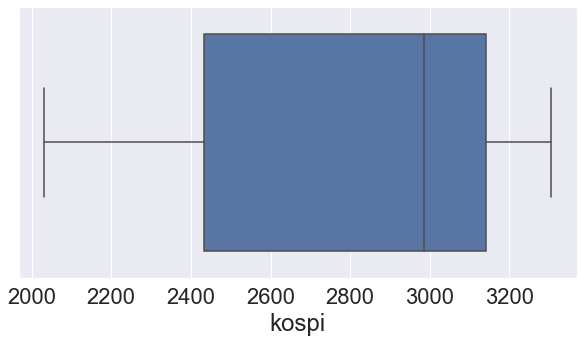

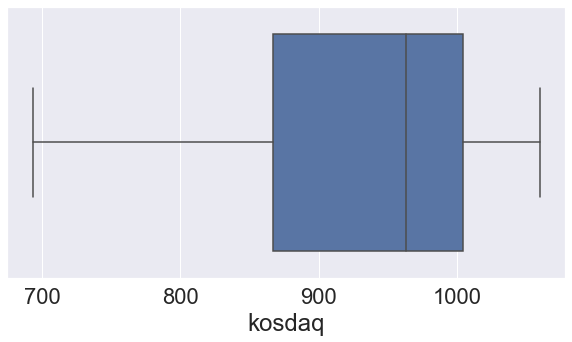

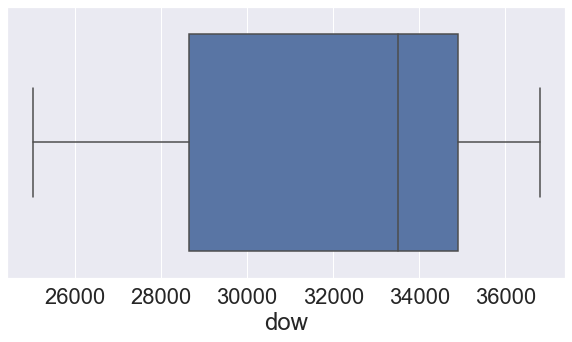

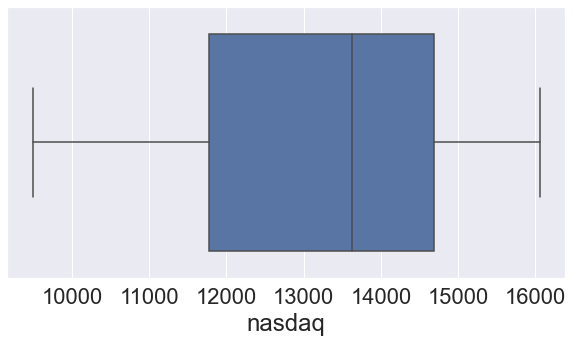

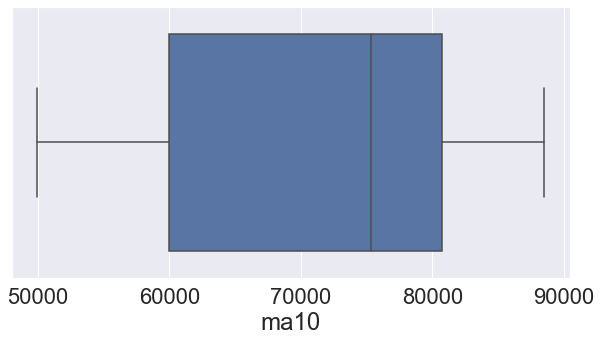

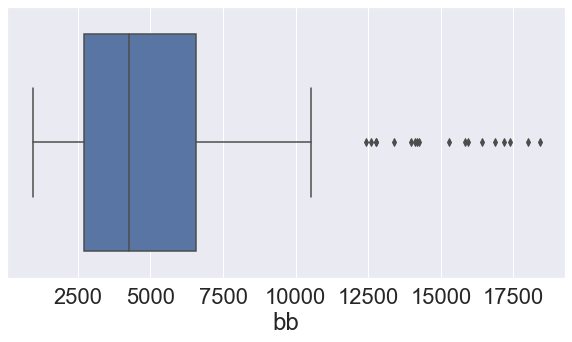

<Figure size 720x360 with 0 Axes>

In [28]:
#사분위수로 이상치 확인
for col in df.columns:
    if col in ['Close', 'Volume','Change','High-Low','exchange','kospi',
              'kosdaq','dow','nasdaq','ma10','bb']:
        sns.boxplot(data=df, x=df[col])
        plt.figure(figsize=(10,5))

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


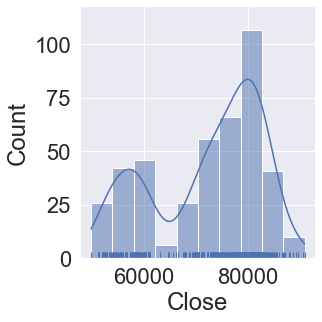

<Figure size 1080x720 with 0 Axes>

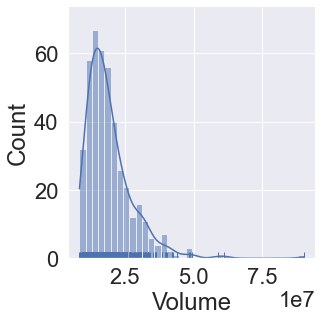

<Figure size 1080x720 with 0 Axes>

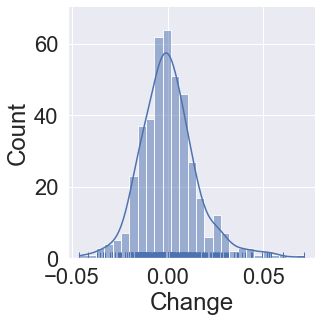

<Figure size 1080x720 with 0 Axes>

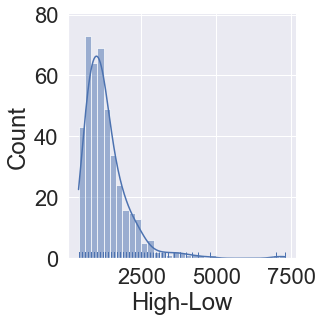

<Figure size 1080x720 with 0 Axes>

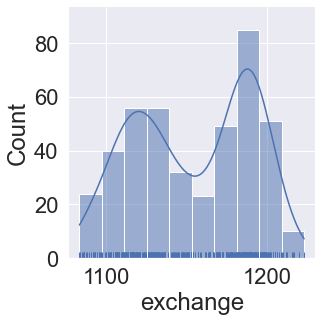

<Figure size 1080x720 with 0 Axes>

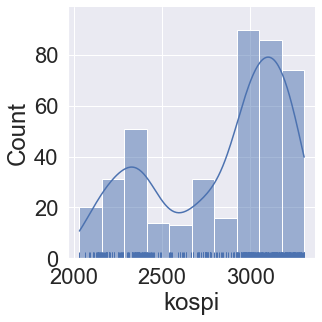

<Figure size 1080x720 with 0 Axes>

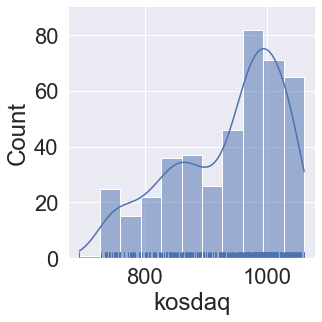

<Figure size 1080x720 with 0 Axes>

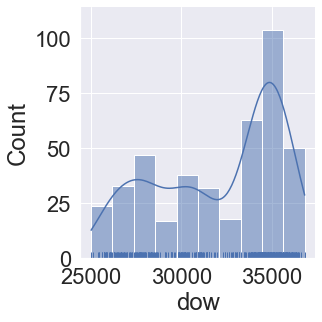

<Figure size 1080x720 with 0 Axes>

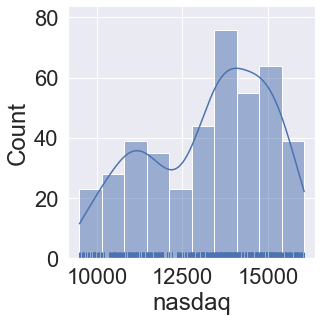

<Figure size 1080x720 with 0 Axes>

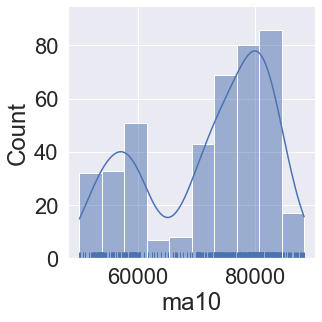

<Figure size 1080x720 with 0 Axes>

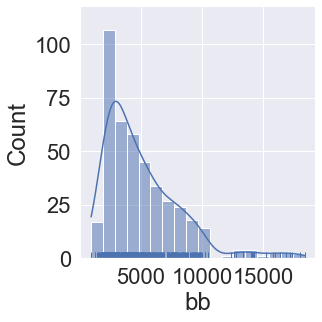

<Figure size 1080x720 with 0 Axes>

In [29]:
#분포도 확인(밀도 포함)
for col in df.columns:
    if col in ['Close', 'Volume','Change','High-Low','exchange','kospi',
              'kosdaq','dow','nasdaq','ma10','bb']:
        sns.displot(data=df, x=df[col], kde=True, rug=True)
        plt.figure(figsize=(15,10))

In [30]:
#EDA로사용하지 않을 변수들 제거
df=df.drop(['Open','High','Low','sp500'],axis=1)

In [31]:
df

,Close,Volume,Change,High-Low,Close-Open,exchange,kospi,kosdaq,dow,nasdaq,ma10,bb
Date,,,,,,,,,,,,
2020-06-01,51200.0,16949183.0,0.009862,600.0,400.0,1222.92,2065.08,735.72,25383.11,9489.87,49930.0,3152.706069
2020-06-02,51400.0,14247933.0,0.003906,700.0,400.0,1219.62,2087.19,743.58,25475.02,9552.05,50040.0,3650.022831
2020-06-03,54500.0,49257814.0,0.060311,3300.0,2700.0,1215.79,2147.00,737.66,25742.65,9608.38,50490.0,6714.362715
2020-06-04,54600.0,40220334.0,0.001835,2400.0,-1200.0,1216.39,2151.18,742.37,26269.89,9682.91,50955.0,8411.341550
2020-06-05,55500.0,22743629.0,0.016484,1900.0,1100.0,1202.02,2181.87,749.31,26281.82,9615.81,51630.0,9525.264651
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,73700.0,13993255.0,-0.016021,1400.0,-700.0,1197.32,2704.48,852.79,34737.47,13791.15,73710.0,4624.379838
2022-02-15,73700.0,9320365.0,0.000000,1100.0,-400.0,1196.76,2676.54,839.92,34565.78,13790.92,73950.0,3167.894499
2022-02-16,74800.0,10767386.0,0.014925,700.0,200.0,1196.53,2729.68,878.15,34988.31,14139.76,74100.0,3188.869531


최종 데이터셋 = df

# 로그변환

In [32]:
#로그변환 먼저해야한다고함 (왜도 심한 변수들 로그변환!)
df['Volume']=np.log(df['Volume'])
df['High-Low']=np.log(df['High-Low'])
df['bb']=np.log(df['bb'])


## 변수 스케일링

minmax 정규화 함수를 정의합니다
- 첫번째 범위 : 0 ~ 1 ->양수만 있는 경우
- 두번째 범위 : -1 ~ 1 -> 음수도 있는 경우

In [33]:
def minmax_norm1(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

In [34]:
def minmax_norm2(df_input):
    return 2*(df_input - df_input.min()) / ( df_input.max() - df_input.min())-1

Change와 Close-Open의 경우만 음수가 존재하므로 해당 데이터를 제외한 df를 생성합니다

In [35]:
df_tempo = df.drop(['Close-Open'], axis=1) #change는 빼주기 >> 원래분포가 -1에서 1사이로 보임 굳이 변환할필요 없어보인다!
df_tempo

,Close,Volume,Change,High-Low,exchange,kospi,kosdaq,dow,nasdaq,ma10,bb
Date,,,,,,,,,,,
2020-06-01,51200.0,16.645730,0.009862,6.396930,1222.92,2065.08,735.72,25383.11,9489.87,49930.0,8.056016
2020-06-02,51400.0,16.472122,0.003906,6.551080,1219.62,2087.19,743.58,25475.02,9552.05,50040.0,8.202489
2020-06-03,54500.0,17.712579,0.060311,8.101678,1215.79,2147.00,737.66,25742.65,9608.38,50490.0,8.812004
2020-06-04,54600.0,17.509883,0.001835,7.783224,1216.39,2151.18,742.37,26269.89,9682.91,50955.0,9.037336
2020-06-05,55500.0,16.939796,0.016484,7.549609,1202.02,2181.87,749.31,26281.82,9615.81,51630.0,9.161703
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,73700.0,16.454086,-0.016021,7.244228,1197.32,2704.48,852.79,34737.47,13791.15,73710.0,8.439098
2022-02-15,73700.0,16.047712,0.000000,7.003065,1196.76,2676.54,839.92,34565.78,13790.92,73950.0,8.060822
2022-02-16,74800.0,16.192032,0.014925,6.551080,1196.53,2729.68,878.15,34988.31,14139.76,74100.0,8.067422


첫번재 함수로 정규화를 진행합니다

In [36]:
df_tempo=minmax_norm1(df_tempo)
df_tempo

,Close,Volume,Change,High-Low,exchange,kospi,kosdaq,dow,nasdaq,ma10,bb
Date,,,,,,,,,,,
2020-06-01,0.031630,0.295738,0.476264,0.139615,1.000000,0.026883,0.116042,0.031191,0.000000,0.000000,0.406213
2020-06-02,0.036496,0.222656,0.425386,0.192694,0.976325,0.044233,0.137468,0.038991,0.009468,0.002851,0.455501
2020-06-03,0.111922,0.744840,0.907237,0.726616,0.948849,0.091165,0.121330,0.061702,0.018045,0.014515,0.660606
2020-06-04,0.114355,0.659513,0.407691,0.616962,0.953153,0.094445,0.134169,0.106443,0.029393,0.026568,0.736432
2020-06-05,0.136253,0.419528,0.532830,0.536521,0.850061,0.118527,0.153087,0.107456,0.019176,0.044064,0.778282
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,0.579075,0.215063,0.255151,0.431368,0.816343,0.528614,0.435164,0.825003,0.654927,0.616382,0.535121
2022-02-15,0.579075,0.043996,0.392016,0.348328,0.812325,0.506689,0.400082,0.810434,0.654892,0.622602,0.407830
2022-02-16,0.605839,0.104749,0.519519,0.192694,0.810675,0.548388,0.504293,0.846289,0.708008,0.626490,0.410051


음수가 포함된 변수들만으로 이루어진 데이터셋을 만듭니다

In [37]:
df_tempo2=df[['Change','Close-Open']]
df_tempo2

,Change,Close-Open
Date,,
2020-06-01,0.009862,400.0
2020-06-02,0.003906,400.0
2020-06-03,0.060311,2700.0
2020-06-04,0.001835,-1200.0
2020-06-05,0.016484,1100.0
...,...,...
2022-02-14,-0.016021,-700.0
2022-02-15,0.000000,-400.0
2022-02-16,0.014925,200.0


정규화를 진행합니다

In [38]:
df_tempo2=minmax_norm2(df_tempo2)
df_tempo2

,Change,Close-Open
Date,,
2020-06-01,-0.047473,-0.275
2020-06-02,-0.149228,-0.275
2020-06-03,0.814473,0.300
2020-06-04,-0.184618,-0.675
2020-06-05,0.065660,-0.100
...,...,...
2022-02-14,-0.489698,-0.550
2022-02-15,-0.215968,-0.475
2022-02-16,0.039038,-0.325


둘을 합치면 정규화가 완료된 데이터셋이 완성됩니다.(혹시 모를 상황으로 지워질지 몰라서 원본 유지를 위해 다른 데이터 셋을 형성했습니다.)

In [63]:
df2 = pd.concat([df_tempo,df_tempo2],axis=1)
df2

,Close,Volume,Change,High-Low,exchange,kospi,kosdaq,dow,nasdaq,ma10,bb,Change,Close-Open
Date,,,,,,,,,,,,,
2020-06-01,0.031630,0.295738,0.476264,0.139615,1.000000,0.026883,0.116042,0.031191,0.000000,0.000000,0.406213,-0.047473,-0.275
2020-06-02,0.036496,0.222656,0.425386,0.192694,0.976325,0.044233,0.137468,0.038991,0.009468,0.002851,0.455501,-0.149228,-0.275
2020-06-03,0.111922,0.744840,0.907237,0.726616,0.948849,0.091165,0.121330,0.061702,0.018045,0.014515,0.660606,0.814473,0.300
2020-06-04,0.114355,0.659513,0.407691,0.616962,0.953153,0.094445,0.134169,0.106443,0.029393,0.026568,0.736432,-0.184618,-0.675
2020-06-05,0.136253,0.419528,0.532830,0.536521,0.850061,0.118527,0.153087,0.107456,0.019176,0.044064,0.778282,0.065660,-0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,0.579075,0.215063,0.255151,0.431368,0.816343,0.528614,0.435164,0.825003,0.654927,0.616382,0.535121,-0.489698,-0.550
2022-02-15,0.579075,0.043996,0.392016,0.348328,0.812325,0.506689,0.400082,0.810434,0.654892,0.622602,0.407830,-0.215968,-0.475
2022-02-16,0.605839,0.104749,0.519519,0.192694,0.810675,0.548388,0.504293,0.846289,0.708008,0.626490,0.410051,0.039038,-0.325


In [ ]:
df2[['Volume','Change','Close-Open','High-Low','exchange','kospi',
              'kosdaq','dow','nasdaq','ma10','bb']] = df2[['Volume','Change','Close-Open','High-Low','exchange','kospi',
              'kosdaq','dow','nasdaq','ma10','bb']].shift(5)
df2=df2.dropna()
df2

***

# 모델링

In [64]:
# 최종 예측할 5일의 데이터 셋 형성
day_list = ['2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11']

df_recent = df2.loc[day_list]
df_recent

,Close,Volume,Change,High-Low,exchange,kospi,kosdaq,dow,nasdaq,ma10,bb,Change,Close-Open
Date,,,,,,,,,,,,,
2022-02-07,0.562044,0.222446,0.276575,0.378289,0.813114,0.560456,0.562219,0.854897,0.701651,0.622343,0.618495,-0.446851,-0.500
2022-02-08,0.574209,0.141034,0.450528,0.378289,0.809384,0.561563,0.550961,0.855015,0.689113,0.614567,0.541368,-0.098944,-0.450
2022-02-09,0.603406,0.060764,0.531489,0.192694,0.792883,0.579124,0.592558,0.886553,0.716336,0.612234,0.498654,0.062977,-0.275
2022-02-10,0.620438,0.315078,0.472068,0.348328,0.834350,0.581541,0.552079,0.912459,0.761393,0.613012,0.515360,-0.055864,-0.425
2022-02-11,0.608273,0.157519,0.335367,0.279230,0.831839,0.562536,0.502303,0.867791,0.714994,0.615345,0.537234,-0.329266,-0.400


In [65]:
# 학습, 테스트, 검증할 데이터셋 형성
df_fellow = df2.drop([df2.index[-5],df2.index[-4],df2.index[-3],df2.index[-2],df2.index[-1]])
df_fellow

,Close,Volume,Change,High-Low,exchange,kospi,kosdaq,dow,nasdaq,ma10,bb,Change,Close-Open
Date,,,,,,,,,,,,,
2020-06-01,0.031630,0.295738,0.476264,0.139615,1.000000,0.026883,0.116042,0.031191,0.000000,0.000000,0.406213,-0.047473,-0.275
2020-06-02,0.036496,0.222656,0.425386,0.192694,0.976325,0.044233,0.137468,0.038991,0.009468,0.002851,0.455501,-0.149228,-0.275
2020-06-03,0.111922,0.744840,0.907237,0.726616,0.948849,0.091165,0.121330,0.061702,0.018045,0.014515,0.660606,0.814473,0.300
2020-06-04,0.114355,0.659513,0.407691,0.616962,0.953153,0.094445,0.134169,0.106443,0.029393,0.026568,0.736432,-0.184618,-0.675
2020-06-05,0.136253,0.419528,0.532830,0.536521,0.850061,0.118527,0.153087,0.107456,0.019176,0.044064,0.778282,0.065660,-0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,0.562044,0.222446,0.276575,0.378289,0.813114,0.560456,0.562219,0.854897,0.701651,0.622343,0.618495,-0.446851,-0.500
2022-02-08,0.574209,0.141034,0.450528,0.378289,0.809384,0.561563,0.550961,0.855015,0.689113,0.614567,0.541368,-0.098944,-0.450
2022-02-09,0.603406,0.060764,0.531489,0.192694,0.792883,0.579124,0.592558,0.886553,0.716336,0.612234,0.498654,0.062977,-0.275


In [138]:
X = df_fellow[["Volume","Change","High-Low","exchange","kospi","kosdaq","dow","nasdaq","ma10","bb","Close-Open"]]
X
y=df_fellow[["Close"]]

In [139]:
y

,Close
Date,
2020-06-01,0.031630
2020-06-02,0.036496
2020-06-03,0.111922
2020-06-04,0.114355
2020-06-05,0.136253
...,...
2022-02-07,0.562044
2022-02-08,0.574209
2022-02-09,0.603406


In [140]:
X=X.to_numpy()
y=y.to_numpy()

In [141]:
def make_sequence_dataset(feature,label,window_size):
    feature_list = []
    label_list = []
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size]) #2차원의 행렬형태
        label_list.append(label[i+window_size])
    return np.array(feature_list),np.array(label_list) #2차원을 3차원 텐서로 만듦
#시계열 데이터 생성

In [142]:
window_size=20
X,y = make_sequence_dataset(X,y,window_size)
print(X.shape,y.shape)

(401, 20, 12) (401, 1)


In [143]:
# 훈련, 테스트 셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 20, 12)
(81, 20, 12)
(320, 1)
(81, 1)


In [145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [146]:
model = Sequential()  # 시퀀셜 모델 생성
model.add(LSTM(128, activation='tanh', input_shape=X_train[0].shape))   # LSTM 레이어
model.add(Dense(1, activation='relu'))   # FC 레이어
model.add(Dense(1, activation='linear'))   # FC 레이어

In [147]:
# 컴파일
model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])

In [148]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               72192     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
Total params: 72,323
Trainable params: 72,323
Non-trainable params: 0
_________________________________________________________________


In [149]:
# n번(patience)의 에포크 이상 검증 세트에서의 손실이 감소하지 않으면 학습 자동 중단
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [150]:
# 학습
hist = model.fit(X_train, y_train,
                 epochs=1000,
                 batch_size=32,
                 validation_split=0.2,
                 callbacks=[early_stopping])

Epoch 1/1000
8/8 [==============================] - 2s 234ms/step - loss: 0.3673 - mae: 0.5314 - mse: 0.3673 - val_loss: 0.4136 - val_mae: 0.6382 - val_mse: 0.4136
Epoch 2/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.3587 - mae: 0.5234 - mse: 0.3587 - val_loss: 0.4036 - val_mae: 0.6303 - val_mse: 0.4036
Epoch 3/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.3505 - mae: 0.5154 - mse: 0.3505 - val_loss: 0.3936 - val_mae: 0.6223 - val_mse: 0.3936
Epoch 4/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.3424 - mae: 0.5075 - mse: 0.3424 - val_loss: 0.3838 - val_mae: 0.6144 - val_mse: 0.3838
Epoch 5/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.3345 - mae: 0.4996 - mse: 0.3345 - val_loss: 0.3743 - val_mae: 0.6065 - val_mse: 0.3743
Epoch 6/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.3268 - mae: 0.4918 - mse: 0.3268 - val_loss: 0.3649 - val_mae: 0.5988 - val_mse: 0.3649
Epoch 7/1000
8/8 [===

8/8 [==============================] - 0s 51ms/step - loss: 0.1286 - mae: 0.3139 - mse: 0.1286 - val_loss: 0.1073 - val_mae: 0.3176 - val_mse: 0.1073
Epoch 52/1000
8/8 [==============================] - 0s 52ms/step - loss: 0.1266 - mae: 0.3126 - mse: 0.1266 - val_loss: 0.1043 - val_mae: 0.3130 - val_mse: 0.1043
Epoch 53/1000
8/8 [==============================] - 0s 59ms/step - loss: 0.1247 - mae: 0.3114 - mse: 0.1247 - val_loss: 0.1015 - val_mae: 0.3084 - val_mse: 0.1015
Epoch 54/1000
8/8 [==============================] - 1s 82ms/step - loss: 0.1231 - mae: 0.3104 - mse: 0.1231 - val_loss: 0.0986 - val_mae: 0.3037 - val_mse: 0.0986
Epoch 55/1000
8/8 [==============================] - 1s 65ms/step - loss: 0.1212 - mae: 0.3091 - mse: 0.1212 - val_loss: 0.0960 - val_mae: 0.2994 - val_mse: 0.0960
Epoch 56/1000
8/8 [==============================] - 1s 98ms/step - loss: 0.1195 - mae: 0.3079 - mse: 0.1195 - val_loss: 0.0935 - val_mae: 0.2951 - val_mse: 0.0935
Epoch 57/1000
8/8 [===========

Epoch 150/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0850 - mae: 0.2742 - mse: 0.0850 - val_loss: 0.0205 - val_mae: 0.1260 - val_mse: 0.0205
Epoch 151/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.0850 - mae: 0.2741 - mse: 0.0850 - val_loss: 0.0205 - val_mae: 0.1258 - val_mse: 0.0205
Epoch 152/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.0850 - mae: 0.2741 - mse: 0.0850 - val_loss: 0.0203 - val_mae: 0.1254 - val_mse: 0.0203
Epoch 153/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0849 - mae: 0.2740 - mse: 0.0849 - val_loss: 0.0203 - val_mae: 0.1253 - val_mse: 0.0203
Epoch 154/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0849 - mae: 0.2740 - mse: 0.0849 - val_loss: 0.0203 - val_mae: 0.1251 - val_mse: 0.0203
Epoch 155/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0849 - mae: 0.2740 - mse: 0.0849 - val_loss: 0.0201 - val_mae: 0.1248 - val_mse: 0.0201
Epoch 156/

https://snowdeer.github.io/machine-learning/2018/01/11/keras-use-history-function/  
Keras - history 기능 사용하기

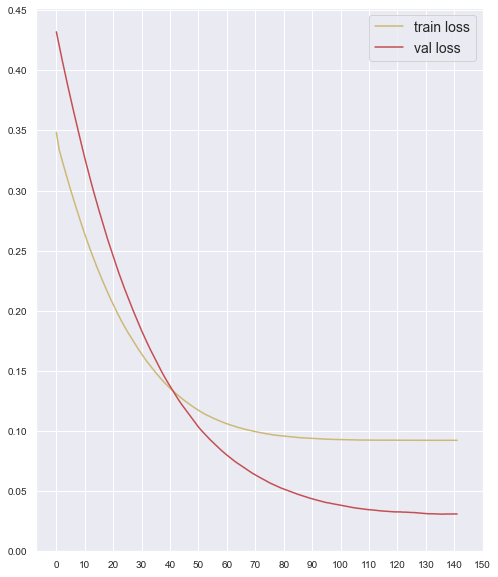

In [117]:
# 학습곡선 시각화
fig, loss_plot = plt.subplots(figsize=(8,10))
loss_plot.plot(hist.history['loss'], 'y', label='train loss')
loss_plot.plot(hist.history['val_loss'], 'r', label='val loss')
plt.yticks(np.arange(0, 0.5, 0.05), fontsize=10)
plt.xticks(np.arange(0, 160, 10), fontsize=10)
loss_plot.legend(fontsize=14)
plt.show()

In [118]:
# 최종 성능 측정
import math
eval = model.evaluate(X_test, y_test)
print(f'rmse: {math.sqrt(eval[1])}')
print(f'nmae: {eval[2]}') # mae아닌가? 

3/3 [==============================] - 0s 2ms/step - loss: 0.0156 - mae: 0.0983 - mse: 0.0156
rmse: 0.31345662086256015
nmae: 0.015602707862854004


# GRU

In [132]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

In [133]:
model = Sequential()  # 시퀀셜 모델 생성
model.add(GRU(128, activation='tanh', input_shape=X_train[0].shape))   # gru레이어
model.add(Dense(1, activation='relu'))   # FC 레이어
model.add(Dense(1, activation='linear'))   # FC 레이어

In [134]:
# 컴파일
model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               54528     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 54,659
Trainable params: 54,659
Non-trainable params: 0
_________________________________________________________________


In [135]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [136]:
# 학습
hist = model.fit(X_train, y_train,
                 epochs=1000,
                 batch_size=32,
                 validation_split=0.2,
                 callbacks=[early_stopping])

Epoch 1/1000
8/8 [==============================] - 1s 184ms/step - loss: 0.3673 - mae: 0.5314 - mse: 0.3673 - val_loss: 0.4137 - val_mae: 0.6382 - val_mse: 0.4137
Epoch 2/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.3589 - mae: 0.5234 - mse: 0.3589 - val_loss: 0.4037 - val_mae: 0.6303 - val_mse: 0.4037
Epoch 3/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.3507 - mae: 0.5155 - mse: 0.3507 - val_loss: 0.3938 - val_mae: 0.6224 - val_mse: 0.3938
Epoch 4/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.3424 - mae: 0.5077 - mse: 0.3424 - val_loss: 0.3841 - val_mae: 0.6146 - val_mse: 0.3841
Epoch 5/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.3348 - mae: 0.4998 - mse: 0.3348 - val_loss: 0.3744 - val_mae: 0.6067 - val_mse: 0.3744
Epoch 6/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.3269 - mae: 0.4920 - mse: 0.3269 - val_loss: 0.3651 - val_mae: 0.5989 - val_mse: 0.3651
Epoch 7/1000
8/8 [===

8/8 [==============================] - 0s 26ms/step - loss: 0.1286 - mae: 0.3139 - mse: 0.1286 - val_loss: 0.1073 - val_mae: 0.3177 - val_mse: 0.1073
Epoch 52/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.1266 - mae: 0.3126 - mse: 0.1266 - val_loss: 0.1045 - val_mae: 0.3132 - val_mse: 0.1045
Epoch 53/1000
8/8 [==============================] - 0s 23ms/step - loss: 0.1248 - mae: 0.3115 - mse: 0.1248 - val_loss: 0.1016 - val_mae: 0.3086 - val_mse: 0.1016
Epoch 54/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.1231 - mae: 0.3104 - mse: 0.1231 - val_loss: 0.0987 - val_mae: 0.3039 - val_mse: 0.0987
Epoch 55/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.1213 - mae: 0.3092 - mse: 0.1213 - val_loss: 0.0961 - val_mae: 0.2995 - val_mse: 0.0961
Epoch 56/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.1196 - mae: 0.3080 - mse: 0.1196 - val_loss: 0.0935 - val_mae: 0.2952 - val_mse: 0.0935
Epoch 57/1000
8/8 [===========

8/8 [==============================] - 1s 100ms/step - loss: 0.0877 - mae: 0.2808 - mse: 0.0877 - val_loss: 0.0328 - val_mae: 0.1641 - val_mse: 0.0328
Epoch 102/1000
8/8 [==============================] - 1s 107ms/step - loss: 0.0875 - mae: 0.2805 - mse: 0.0875 - val_loss: 0.0323 - val_mae: 0.1627 - val_mse: 0.0323
Epoch 103/1000
8/8 [==============================] - 1s 103ms/step - loss: 0.0873 - mae: 0.2803 - mse: 0.0873 - val_loss: 0.0318 - val_mae: 0.1613 - val_mse: 0.0318
Epoch 104/1000
8/8 [==============================] - 1s 65ms/step - loss: 0.0871 - mae: 0.2800 - mse: 0.0871 - val_loss: 0.0313 - val_mae: 0.1600 - val_mse: 0.0313
Epoch 105/1000
8/8 [==============================] - 0s 41ms/step - loss: 0.0870 - mae: 0.2798 - mse: 0.0870 - val_loss: 0.0308 - val_mae: 0.1585 - val_mse: 0.0308
Epoch 106/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0869 - mae: 0.2796 - mse: 0.0869 - val_loss: 0.0303 - val_mae: 0.1572 - val_mse: 0.0303
Epoch 107/1000
8/8 [==

8/8 [==============================] - 0s 37ms/step - loss: 0.0849 - mae: 0.2732 - mse: 0.0849 - val_loss: 0.0189 - val_mae: 0.1205 - val_mse: 0.0189
Epoch 200/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0849 - mae: 0.2732 - mse: 0.0849 - val_loss: 0.0189 - val_mae: 0.1204 - val_mse: 0.0189
Epoch 201/1000
8/8 [==============================] - 0s 46ms/step - loss: 0.0849 - mae: 0.2732 - mse: 0.0849 - val_loss: 0.0189 - val_mae: 0.1206 - val_mse: 0.0189


In [137]:
import math
eval = model.evaluate(X_test, y_test)
print(f'rmse: {math.sqrt(eval[1])}')
print(f'nmae: {eval[2]}') 

3/3 [==============================] - 0s 5ms/step - loss: 0.0109 - mae: 0.0865 - mse: 0.0109
rmse: 0.29410520748170343
nmae: 0.010860984213650227
